## Homework \#1

Student: Alan Akil

Course: Math 6397 - Stochastic Processes in Biology

Professors: Dr. Josić & Dr. Stewart

Here I provide numerical simulations used in the solution to problems 1 and 2.

$\textbf{Problem 1:}$

Come up with an "explosive" process, that is a birth process which cannot be normalized for all finite times. Write a program to simulate this process. You will have to be careful in the implementation as realizations can (and typically will) "blow up" in finite time.

In [1]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
import time

In [25]:
# Number of sample time increments.
T = 10 ** 2

# Fix the seed for reproducibility
np.random.seed(1)

n = np.zeros(T) # Pop size.
v = np.zeros(T) # Rate.
t = np.zeros(T) # Actual time.

# Initial population size.
n[0] = 1

c = 1

for i in range(T-1):
    # Sample from Unif
    p = np.random.uniform()
    
    # Set the non-homogenous rate
    v[i] = c * (n[i] ** 2)
    
    # Sample the time increment
    inter_t = -np.log(p) / v[i]
        
    # Update the time and pop size
    n[i+1] = n[i] + 1
    t[i+1] = t[i] + inter_t
    
## Do a second realization with more events
# Number of sample time increments.
T1 = 10 ** 6

# Fix the seed for reproducibility
np.random.seed(2)

n1 = np.zeros(T1) # Pop size.
v1 = np.zeros(T1) # Rate.
t1 = np.zeros(T1) # Actual time.

# Initial population size.
n1[0] = 1

c1 = 1

for i in range(T1-1):
    # Sample from Unif
    p = np.random.uniform()
    
    # Set the non-homogenous rate
    v1[i] = c1 * (n1[i] ** 2)
    
    # Sample the time increment
    inter_t = -np.log(p) / v1[i]
        
    # Update the time and pop size
    n1[i+1] = n1[i] + 1
    t1[i+1] = t1[i] + inter_t    


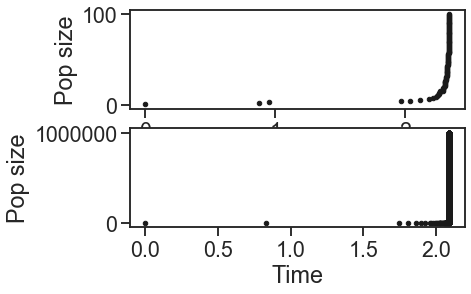

In [26]:
fig, (ax1, ax2) = plt.subplots(2)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":3.3})

ax1.plot(t,n,'k.')
ax2.plot(t1,n1,'k.')

ax1.set(xlabel='Time', ylabel='Pop size')
ax2.set(xlabel='Time', ylabel='Pop size')

plt.show()

Clearly, the process explodes very fast in finite time.

$\textbf{Problem 2:}$

Give an example to show that this is not true for more general birth and death processes with immigration, and illustrate the example numerically.

In [241]:
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [243]:
def birthdeathimigration(lamda, mu, nu, realizations,T,n0,dt):
    
    # Pre-allocation and initialization
    s = np.zeros((realizations, len(T)))
    n = np.zeros((realizations, len(T)))
    n[:,0] = n0
    s[:,0] = 0.00
    
    for j in range(realizations):
        i = 0
        for i in range(len(T)-1):
            U1 = np.random.rand()
            U2 = np.random.rand()
            U3 = np.random.rand()
#             h = - np.log(U1)/((lamda+mu)*n[j,i]+nu)
#             s[j,i+1] = s[j,i] + h
            
            if U1 < lamda*n[j,i]/((lamda+mu)*n[j,i]+nu):
                n[j,i+1] = n[j,i] + 1 # a birth occurs
            if U1 >= lamda*n[j,i]/((lamda+mu)*n[j,i]+nu)\
            and U1 < (lamda+mu)*n[j,i]/((lamda+mu)*n[j,i]+nu): 
                n[j,i+1] = n[j,i] - 1 # a death occurs
            if U1 >= (lamda+mu)*n[j,i]/((lamda+mu)*n[j,i]+nu):
                n[j,i+1] = n[j,i] + 1 # immigration occurs

    return [n, s]

In [262]:
# Parameters.
lamda = 1
mu = 1
nu = 1
realizations = 100
# N = 50
end_time = 40
n0 = 50
dt = 0.01
T = np.arange(0,end_time,dt)


np.random.seed(103)

[n,s] = birthdeathimigration(lamda, mu, nu, realizations,T,n0,dt)

/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


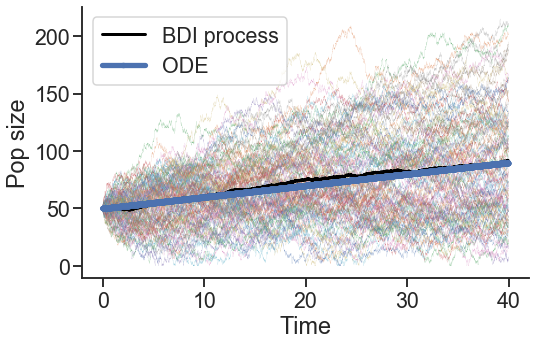

In [263]:
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":5.3})

for i in range(realizations):
    plt.plot(T,n[i,:], linewidth=0.1)

plt.plot(T,np.mean(n,axis=0), linewidth=3, color='black',label='BDI process')

t = T
y0 = n0
f = lambda y,t: (lamda-mu)*y + nu
y = odeEuler(f,y0,t)
plt.plot(t,y,'b.-',label='ODE')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Pop size')

sns.despine()

plt.show()

Could not find a parameters or modifications that would separate the solutions.